<a href="https://colab.research.google.com/github/sebcalcagno/AnalisisSeriesTemporales/blob/main/AST_Clase_2_ejercicio_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="alert alert-block alert-info">
    <h1>Análisis de Series Temporales</h1>
    <h3>Clase 2</h3>
    <h3>Ejercicio 3</h3>
        <p>Docente: Rodrigo Del Rosso<p>
        <p>Asistentes: Sebastián Calcagno / Fernando Martínez<p> 
</div>

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARMA
# https://stackoverflow.com/questions/69047074/no-module-named-statsmodels-tsa-arima-in-colab-but-not-in-pycharm


import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# pip install pmdarima==1.2.1
# https://pypi.org/project/pmdarima/1.2.1/


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
plt.rcParams['figure.figsize']=[10,7.5]

In [ ]:
# Simulamos AR(2)
ar2=np.array([1,0.33,0.5])

In [ ]:
AR2= ArmaProcess(ar2).generate_sample(nsample=1000)

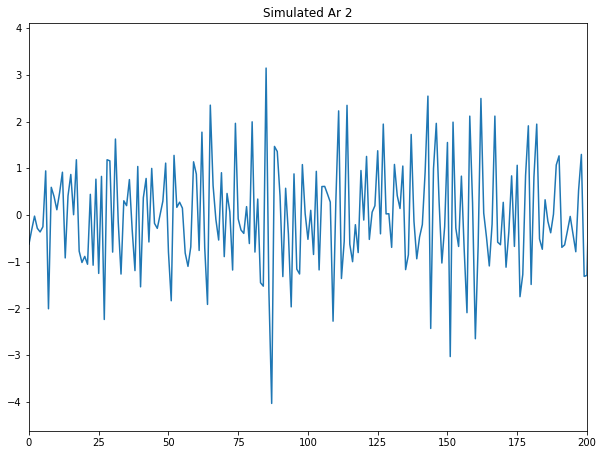

In [ ]:
plt.plot(AR2)
plt.title('Simulated Ar 2')
plt.xlim([0,200])
plt.show()

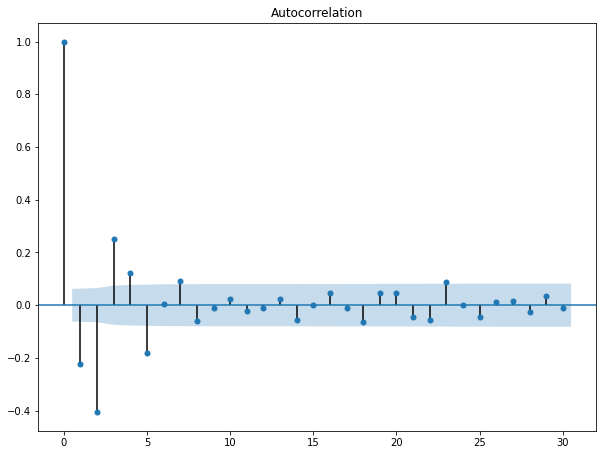

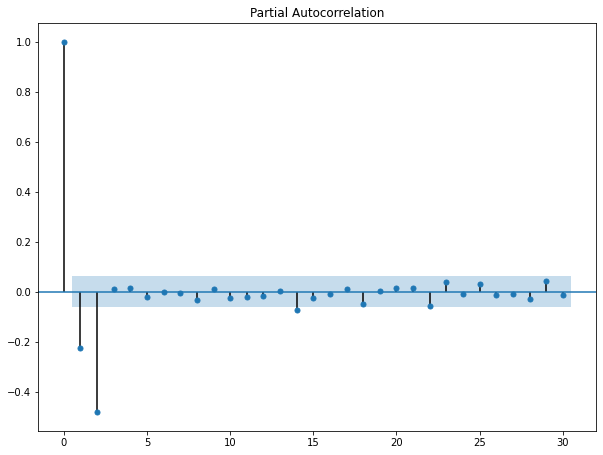

In [ ]:
plot_acf(AR2);
plot_pacf(AR2);

Aqui vamos a trabajar con un modelo AR2

In [ ]:
ar2_modelo = ARIMA(AR2, order=(2, 0, 0)).fit()

In [ ]:
print(f"Los parametros del modelo AR(2) son : {ar2_modelo.arparams} ") 

Los parametros del modelo AR(2) son : [-0.3316775  -0.48063677] 


In [ ]:
print(f"Los criterios de informacion AIC y BIC del modelo AR(2) elegido son : {ar2_modelo.aic, ar2_modelo.bic} ") 

Los criterios de informacion AIC y BIC del modelo AR(2) elegido son : (2903.3303459555605, 2922.961367071489) 


In [ ]:
print(ar2_modelo.params)

[ 0.02039468 -0.30587815 -0.5059655 ]


Aqui vemos otro codigo para obtener lo mismo

In [ ]:
modelo_ar2 = ARMA(AR2, order=(2,0))

In [ ]:
resultos_ar2 = modelo_ar2.fit()

In [ ]:
resultos_ar2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(2, 0)   Log Likelihood               -1447.665
Method:                       css-mle   S.D. of innovations              1.029
Date:                Sun, 19 Jun 2022   AIC                           2903.330
Time:                        16:08:24   BIC                           2922.961
Sample:                             0   HQIC                          2910.792
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0204      0.018      1.135      0.257      -0.015       0.056
ar.L1.y       -0.3059      0.027    -11.209      0.000      -0.359      -0.252
ar.L2.y       -0.5060      0.027    -18.559      0.000      -0.559      -0.453
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.3023           -1.3730j            1.4059           -0.2845
AR.2           -0.3023           +1.3730j            1.4059            0.2845
-----------------------------------------------------------------------------
"""